![DSC logo](_static/images/DSCLogo.png)
# Heather Loves Principal Component Analysis

<div style='float: right; width: 200px;margin-left: 7px;margin-top: 0px;'>
<img src='_static/images/bookcovers/dsc10_cover.jpg' alt='DSC 10 book cover' />
</div>

by Mark Algee-Hewitt, Katherine Bowers, Quinn Dombrowski, and Heather Froehlich

July 20, 2021

## Quinn
Have you ever been to one of those DH talks that involved dazzling graphs, showing some aspect of literature at a scale way bigger than you can imagine, and thought to yourself, “Wow… I wonder *how they did that*?” These slides usually whiz by at a brisk clip, appearing just long enough for you to marvel at the nicely-clustered bunches of colorful dots with a brief explanation from the speaker, before moving on to the next thing. I don’t think there’s some kind of conspiracy afoot here -- like most DH work, there’s just *so much* you want to share, especially with a DH-friendly audience, and only so much you can pack into 20 or even 40 minutes. But one side effect of the quick pace of these talks is that they rarely stay on one colorful visualization long enough for the sense of unease to sink in. There are some visualizations that the audience knows how to read. Comparing the number of occurrences for different character names? Yup, no problem, that’s the stuff of first grade math.

<img src='_static/images/dsc10_barchart.png' alt='A DH bar chart with character names vs an excerpt from a 1st grade math worksheet' />

But how do you grapple with something like this?

<img src='_static/images/dsc10_mark_typicality.png' alt='A slide from Mark Algee-Hewitt with a PCA graph' />

This was a slide from a talk that Associate Data-Sitter Mark Algee-Hewitt gave at *DARIAH Beyond Europe*, a conference at Stanford a few weeks before I started working there in fall 2018. He was speaking about a project in the Stanford Literary Lab called “Typicality”, or “Typicality as Mean”. This chart shows American fiction-- specifically, the Gale American Fiction corpus. My fellow Data-Sitter Roopsi critiqued that corpus in our recent LitLab talk, on account of all the American fiction that gets left out -- significantly, non-English fiction and fiction by people who were not white men with access to mainstream commercial publishing channels. Anyhow, with those caveats in place, it takes this corpus of (a subset of) American fiction and looks for the “most average” one -- the one that is closest to the middle. Not one off in the romance cluster, not one over by the mysteries. Just… totally average for this corpus, or as close to it as you can get.

That book, by the way, is “The Dragon’s Daughter” by Clyde C. Westover. In his talk, Mark noted that he’s probably one of the only people to have read it all the way through in the last 50 years -- which immediately prompted me to download it from Project Gutenberg and attempt the slog myself. But boy, is it ever a slog. A hackneyed plot, liberally sprinkled with jaw-dropping racism, applied to everyone from an Irish policeman to the protagonists who are implicated in the Chinese mafia of San Francisco. I gave up halfway through, so I guess Mark can legitimately keep saying he’s the only one who’s read it. (In Russian there’s a handy set of verbal prefixes you can use to differentiate “read some of” and “read all the way to the end”. I miss having those in English.)

But even as I’ve tried to put “The Dragon’s Daughter” out of my mind, I haven’t forgotten about that visualization. I wanted to understand what he did to make it -- and even more importantly, I wanted to *actually* understand how to read it, beyond smiling and nodding along with the explanation. 

One of the cool things about the Data-Sitters Club being part of the LitLab is that it makes it easy to build on work that’s been done for other projects. (And all the other Lab members have been super nice about answering my questions and helping me wrangle their code.) The Typicality code is Mark’s, and Mark primarily works in R. I don’t know how to explain this to a monolingual English speaker, but dealing with R code when you’re … let’s call it an “intermediate” Python user is kind of like trying to read Italian with high-school Spanish. (Or, if I’m having a bad day, like trying to read *Romanian* with high-school Spanish.) Most of the high-level structure of the language is comparable, and a lot of the roots are recognizable, but I wouldn’t claim it’s something I’m exactly comfortable doing.

On one hand, it would make sense to show you the Typicality code next, then talk about how to interpret it. On the other hand, the Typicality code is going to make a lot more sense after we talk, conceptually, about what it’s doing. (Trust me on this, as someone who ran the Typicality code blindly for a while before understanding it.) So for the moment, let’s just say I ran some code and visualized the output and it looked something like Mark’s all-the-dots viz, but with the Baby-Sitters Club books. All we needed was someone to help interpret it. And I knew just the person.

### Meet Heather
Heather Froehlich (Penn State University) has wavy-curly red hair and a more-than-passing similarity in style to the famed missing Waldo. She has an affinity for stripes, and like the Baby-Sitters Club members spent her tween years in New England. She spends a lot of time pondering computers and how they understand language. She spends even more time thinking about what people’s brains can do with the resulting data, because as she will be the first to tell you, “computers are dumb boxes of plastic and metal”. In her position as Literary Informatics Librarian at Penn State University, she has the opportunity to consult with a range of scholars in diffuse fields about all the ways people can work smartly with the data computers give us and how to get them to give it to us. She loves a good corpus. 

Heather is the author of such DH hits as "[Moby Dick is About Whales, or Why Should We Count Words?](https://hfroehli.ch/2019/09/27/moby-dick-is-about-whales-or-why-should-we-count-words/)", as well as the Programming Historian tutorial on [Corpus Analysis with AntConc](https://programminghistorian.org/en/lessons/corpus-analysis-with-antconc), which Anouk referenced in [DSC #4: AntConc Saves the Day](https://datasittersclub.github.io/site/dsc4.html). Heather likes math -- and even better, she likes explaining how various computational methods actually work, and was kind enough to give me and Katia a crash course on PCA.

## Katia

### Heather Likes Principal Component Analysis
It was March 2021 when we spoke with Heather. We were both in the busy part of the term, and overwhelmed with Zooms, but it was enjoyable to spend a couple of hours with Heather and her spreadsheets. And oh were there spreadsheets! But more on that in a bit.  

As usual, Quinn was overwhelmed with enthusiasm for the topic at hand, and it took some effort to pause for introductions first. (You, too, can pause for introductions by checking out the [Data-Sitters Club Chapter 2 page](https://datasittersclub.github.io/site/chapter-2).) Quinn and Heather knew each other, but Heather and I didn't, so introductions were needed!

“Okay, so my name is Katia and I’m an Associate Professor of Slavic Studies at the University of British Columbia, and I work on 19th-century Russian lit. My research expertise is in genre and narrative theory.” I explained. “Also, I am fascinated by the Baby-Sitters Club books, which was true when I was eight and apparently it's still true, and I’ve read a lot of them. I’m relatively new to DH, and so I usually have a lot of questions about how we do things.”

“What I really do is, I’ve worked on a lot of projects, including a very big project called Visualizing English Print (1472-1700) where we did a lot of work using Principal Component Analysis as a way to kind of get into texts as a process,” said Heather. “I’ve spent a lot of time working both with computer scientists and people like Katia who are close enough to DH to be, like, ‘We have maybe heard of these things.’ As for myself, my background is in corpus linguistics-- language and sort of stylistics as a whole-- and I'm really interested in language variation and change as the sort of underlying feature of all this.”

Not unlike Stacey McGill, Heather really does love math and, in the absence of a whiteboard and shared space, she sent us searching for our own pen and paper so we could draw some graphs of our own. Old school style.

“So we're first going to talk a little bit about what the graph is and what we're doing with these graphs. Then, we’ll cover what PCA is and how it works, what we’re thinking when we talk about PCA which might be a better version of the same idea as graphs. Then we'll dive into a couple of these examples as a way to kind of get thinking about the relationship between different texts.”

Quinn and I nodded, pens at the ready.

First, Heather had us draw a giant plus-sign in the middle of our paper.

<img src='_static/images/dsc10_plussign.jpg' alt='A piece of paper with a giant plus sign.' />

“This is a graph,” Heather reminded us. “We learned about this in grade school and then promptly forgot about it as quickly as possible because we hated it.” Quinn nodded enthusiastically.

“We're going to call each of these little sections a quadrant. So, we are familiar with some of these and…” Heather wrestled with the pen, her laptop webcam, and Zoom lighting. “This is why God invented whiteboards…” she muttered.

“Okay, so if you can do me a favor, and on your papers follow this labeling system: so you say, 2-1-3-4.” Heather held up her paper.

<img src='_static/images/dsc10_quadrantlabels.jpg' alt='A piece of paper with a giant plus sign and quadrant labels.' />

“And you may be going, ‘That's wrong, this should be 1234,’” Heather suggested, but I knew better.

“No, yes. I actually started a computer science degree in undergrad,” I chimed in, impressed with myself for remembering something from such a long time ago in the misty past. Most of the things I learned during those three semesters have entirely been replaced by Russian grammar.

Heather smiled. “Okay, good, you guys actually remember something from math class. Not everyone does, so that is going to help us today.”

“Um, math class did not go well for me, so I will be the person who's confused now,” admitted Quinn.

“Okay,” Heather revised. “So this is the X-axis, this is the Y-axis, and you can label those accordingly on your own pieces of paper.”

<img src='_static/images/dsc10_xyaxes.jpg' alt='A piece of paper with a giant plus sign and quadrant labels and x and y axes labeled.' />

“So usually, when we talk about graphs, one of the first blockers is that often all we see is where the X-axis and the Y-axis intersect on a graph. But if we keep drawing these lines, when the Y-axis goes further down, that shows that there's a negative element to this graph. The ones on the bottom are all negative, the ones on the top are all positive, and this little dot right here in the middle is zero, where the two lines cross.”

<img src='_static/images/dsc10_zero.jpg' alt='A piece of paper with a giant plus sign and quadrant labels and x and y axes labeled and 0,0 labeled.' />

“It’s more rare, but you might find that you have negative things on the X-axis too, on the left, though most graphs you encounter in the world tend to be on the positive side of things. Thinking about this as a larger whole requires thinking about the relationship between each of these boxes with the other boxes,” explained Heather. “We're going to be talking about this as a *whole space*, as opposed to just the one space with only positive numbers that we're most used to seeing on graphs.”

Heather went around each quadrant of the graph, jotting down whether each axis was positive or negative.

<img src='_static/images/dsc10_posneg.jpg' alt='A piece of paper with a giant plus sign and quadrant labels and x and y axes labeled and 0,0 labeled.' />

“Graphing generally is trying to find relationships between multiple points of stuff,” said Heather, before pausing to reconsider. “Well, my computer scientists are going to tell me something else, but most people commonly look at relationships between different kinds of stuff in graph spaces. Principal component analysis, or PCA, is a way of taking lots of data and condensing it into something that is more human readable.”

### PCA for Pets
The graphs that immediately leapt to all of our minds were COVID-related, those charts of daily positive tests, hospitalizations, deaths that had dominated the news and social media. But learning PCA using people’s suffering and death didn’t feel right for the Data-Sitters Club. So instead, let’s talk pets. In *BSC #22: Jessi Ramsey, Pet-Sitter*, the Mancusi family has a ridiculous number of pets:

* Cheryl - Great Dane
* Jacques - Golden Retriever
* Pooh Bear - poodle who eats low-cal chow
* Powder - kitten
* Crosby - orange-striped cat
* Ling-ling - Siamese cat
* Tom - gray cat
* Rosie - cat
* Lucy - Guinea Pig
* Ricky - Guinea Pig
* Fluffer-Nut - rabbit
* Cindy - rabbit
* Toto - rabbit
* Robert - rabbit
* Snicklefritz - hamster
* Frank - bird
* Annabelle - parrot
* Barney - Snake
* Various turtles and fish

Let's imagine that the Mancusis are also eccentric data scientists, and instead of just telling Jessi what she's in for with pet-sitting for them, they give Jessi a spreadsheet with data about the pets. If they only give her one parameter, like weight, she might consider graphing it.

| **Pet**              | **Weight**  |
|------------------|---------|
| Cheryl           | 105 lbs |
| Jacques          | 70 lbs  |
| Pooh Bear        | 50 lbs  |
| Powder           | 1.5 lbs |
| Crosby           | 15 lbs  |
| Ling-ling        | 5 lbs   |
| Tom              | 18 lbs  |
| Rosie            | 12 lbs  |
| Lucy             | 1.8 lbs |
| Ricky            | 2.1 lbs |
| Fluffer-Nutter   | 2.6 lbs |
| Cindy            | 6 lbs   |
| Toto             | 5.7 lbs |
| Robert           | 6.2 lbs |
| Snickelfritz     | .13 lbs |
| Frank            | .09 lbs |
| Anabelle         | .6 lbs  |
| Barney           | 0.3 lbs |
| Unnamed Turtle 1 | 3 lbs   |
| Unnamed Turtle 2 | 3.7 lbs |
| Unnamed Fish 1   | .5 lbs  |
| Unnamed Fish 2   | .17 lbs |
| Unnamed Fish 3   | .19 lbs |
| Unnamed Fish 4   | .3 lbs  |
| Unnamed Fish 5   | .21 lbs |

In addition to weight, imagine all the other data you could assemble on your pets! Length, number of teeth, number of legs, number of claws, number of scales, approximate number of hairs, how loud the pet is. You might be wondering, “Why are we ignoring the elephant in the room and not using something like ‘species’ or ‘color’?” (Thankfully, the Mancusi menagerie does not include an actual elephant.) PCA works with *continuous* data, and it’s not intended for data that codes categories with 1’s and 0’s (e.g. if there were a “dog” column), or other arbitrary marks intended to designate categories (e.g. if there were a “species” column where 1 = “dog”, 2 = “cat”, etc.)[^1]

[^1]: 'That said, there’s a workaround! As Mark pointed out to us, “Multiple Correspondence Analysis (or MCA) is effectively PCA with categorical data. It's pretty big in European sociology - Gisèle Sapiro uses it a lot.”'

Jessi might try a bar graph on the pets’ weight to get a sense of what she’s dealing with, and if she has weight + length, she might try a line graph. But once we start throwing in teeth and legs and hairs and average decibels, it’s more than Jessi can possibly keep in her head, and the usual graphing software wouldn’t be much happier about it than she is. That said, there is some relationship between all those different traits: longer animals tend to have more hairs (unless they don’t have any). Heavier animals tend to be louder (except for the annoying parakeet). If Jessi were to take the spreadsheet and use PCA on it, odds are that the pets of the same species would cluster together in the resulting chart -- but **not** because PCA somehow “guessed” the species. PCA takes all the data and creates **new** parameters -- called principal components -- that by themselves are uninterpretable numbers, but in their relationship to one another, they capture something meaningful about the relationships between points of the original data.

“I’m going to say, roughly over 6 variables is going to get complicated,” said Heather. “And it depends on what the data looks like, but in general PCA is used for lots of data that intersects in ways that are somewhat meaningful together, like the physical properties of pets or… words in a book.”

Suddenly, we were back to books and word counts.

### Counting Language
"Books, as a whole, have lots of words in them. We're all comfortable with that idea, yes?" asked Heather. Quinn and I nodded, sure that someone in DH would find something to object to there, but we'd already [counted the number of words in our Baby-Sitters Club corpus in DSC #8](https://datasittersclub.github.io/site/dsc8.html#counting-words), and it seemed fair to say it was a lot.

"Books that are written in various styles and formats, they all have lots of words in them, and you can trace them in lots of different ways, right?" Heather continued. "When we think about categories for counting words, there are lots of ways to do it, like only counting words from a certain part of speech. Or, with certain languages, you could get very specific about the different kinds of words you want to count."

"Like perfective vs. imperfective verbs in Slavic!" I offered.

"Sure!" said Heather. "You guys are language people, and you're used to thinking about things like categories, so I won't belabor the point! But it doesn't just have to be grammatical categories! This kind of quantitative approach can look very daunting."

To illustrate her point, she opened a [ginormous spreadsheet](https://graphics.cs.wisc.edu/WP/vep/vep-early-modern-drama-collection/), which she affectionately called her SPREADSHEET OF DOOM, explaining, "This is all of the plays in Early English Books Online, 1472-1700. There are 544 of them, and the spreadsheet has categories that are designed to kind of cover different **kinds** of words. Not, like, parts of speech, but more semantic. Things like abstract words, acknowledgement, anger, apology..."

Her columns scrolled on and on, a blur of numbers. Quinn squinted at the screen, puzzled. "So, how did you get those categories?"

"These are a bunch of categories related to how language functions, using string matching for individual words we've grouped into these categories. So things like 'sorry', or 'I apologize' for the apology category. Not super relevant to what you're doing right now with PCA, but you can [try it out online if you'd like](https://vep.cs.wisc.edu/ubiq/). The point, though, is that this is, like, *way too much information* to make sense of, right? Like, our puny human mind sucks at this."

<img src='_static/images/dsc10_spreadsheet_screenshot.jpg' alt='Quinn, Katia, and Heather looking at the giant spreadsheet of doom.' />

"Like, if we were to think about this, this is a way of almost vectorizing language, right? You've already written a [DSC book that talks about vectorization (DSC #8)](https://datasittersclub.github.io/site/dsc8.html#what-do-we-compare-when-we-compare-texts), and what this is doing is grouping word frequencies for the different categories you're seeing here. Now if you could keep this all in your mind, you could use this kind of number system to say, 'okay, what percentage of each book is made up of nouns, verbs, or adjectives, or semantic categories like apology or anger?' But the thing is, at this scale, this is _way the f*** too much information_!" Heather threw her hands up at the impossibility. "Trying to calculate it all goes off the paper, somewhere outside my window, past the snow, and sleet, and hail, and everything else that's going on out there -- *This. Is. A. Lot.*" Heather took a deep breath. "It's too complicated to keep track of all these individual pieces and the relationships between variables. So PCA is there to help us make sense of all this data at a scale we can handle."

No objections from us! So we scaled things back.

### Counting Claudia Kishi’s Snacks
“I want you to draw 5 columns on your paper for me,” said Heather. “And label them BSC #1-#5. And our rows will be red, yellow, brown, and black. We’re going to make up some percentages for the colors of Claudia Kishi’s snacks mentioned in the books.”

“How much space should we put between the columns?” I asked, and we held our pieces of paper up to Zoom to try to come up with roughly-comparable tables.

We worked out a table, laughing and flinging random percentages into our hand-written cells, trying to ensure our entirely-fictional numbers didn’t add up to something so big that it would exclude the possibility of other categories, like orange Doritos or green M&Ms.

| Snack color | BSC 1 | BSC 2 | BSC 3 | BSC 4 | BSC5 |
|-------------|-------|-------|-------|-------|------|
| red         | 10%   | 35%   | 15%   | 17%   | 20%  |
| yellow      | 50%   | 30%   | 20%   | 25%   | 27%  |
| brown       | 20%   | 10%   | 30%   | 35%   | 24%  |
| black       | 10%   | 20%   | 15%   | 10%   | 10%  |

“Okay, in our hypothetical version of what our spreadsheet is looking like, we're beginning to see that relationships exist across these categories that are relevant to each individual item, yes?” said Heather. I nodded. “That giant spreadsheet I showed you before shows you what it looks like to aggregate your data at a scale that offers a ton of information. This one is a little bit more reasonable to kind of deal with, right? Like, we can kind of talk around this one in ways that feel more accessible. But, imagine that you were to do this for all -- how many Baby-Sitters Club books? You have what, like 60?”

“225 or so,” Quinn deadpanned.

Heather blinked. “Yeah, if you did this with 225, you'd have numbers down to the floor. And that's, again, too much to keep in your head. So let’s go back to this simpler table. So instead of plotting each of these things on a graph, what we want to do is *draw the line that covers the most amount of variation that covers this axis*.”

She gestured towards the grid she had drawn earlier. “I know my hand is making this hard on Zoom. We want to use the X-axis to capture the most variation in the data. So we’re going to look at all the data in the table and condense it into something that is more human-friendly. What value for each book captures the most amount of variation across those books? 250 books x 4 dimensions -- red, yellow, brown, black -- isn’t so big for me to do in my head, but we want the end result to be set into two dimensions so we can graph it.”

“With this Typicality code, there are like 1,000 dimensions because each of the overall most common nouns has a word-count for each book. How do you squish that into two dimensions?” asked Quinn.

“So, crucially, we don’t work well in 1,000 dimensions, right? We struggle after, like, three dimensions most of the time. Even encountering four dimensions in college, it’s like, ‘I don’t know how to do this’. We as humans like to see things visually in two dimensions -- sometimes we can handle three, but we do really well in two dimensions. So that’s what PCA’s trying to do,” explained Heather. “But to get there, we have to flatten the variation in our data a whole bunch. And this comes into play when you’re trying to interpret it.”

### Interpreting Typicality
Heather pulled up the graph that Quinn had generated, running Mark’s Typicality code on the BSC corpus using the top 1,000 nouns. 

<img src='_static/images/dsc10_bsc_nouns.png' alt='PCA of BSC books using top 1k nouns' />

“Everything in quadrant 1 is somehow related. Everything in quadrant 2 is also somehow related. Somewhere in the middle of the graph is (0,0) and this is the most ‘average’ BSC book. Hopefully these are color-coded in some sensible way…” We explained that turquoise was the main series. “Got it,” said Heather. “It looks like the turquoise x’s are distributed throughout all four quadrants, and so are the green asterisks -- those are mysteries, right? But some of the other series cluster more clearly. What do you see with the distribution of the colors? Let’s start with orange -- and use your quadrant names, please.”

“Orange is almost entirely in quadrant one,” I said. “Red, too.”

<img src='_static/images/dsc10_bsc_orangered.png' alt='PCA of BSC books using top 1k nouns with orange and red highlighted' />

“Okay, what about brown?”

“Mostly quadrant two, but a few are scattered elsewhere.”

“There’s not a ton of yellows that I see,” Heather noted.

“Yeah, there’s not many of those, they’re the ‘profile collection’, which is basically character autobiographies,” said Quinn. 

“So you see where I’m going with this?” asked Heather. “We can see that some of these things are clustered together, and when we think about the genres of these things it often makes sense that genre and series might be related.” Heather squinted at the diagram. “What’s ‘CD’, those orange ones?”

“It’s the California Diaries, which was an edgier spin-off series with Dawn and her friends in California,” I explained.

“Ahh, so it would make sense if those were unlike mysteries, which don’t go near that part of quadrant 1” noted Heather. “The other thing that's really useful about these kinds of graphs and PCA as a whole is that it helps you think about some of these quadrants or spaces as diametrically opposed. So something that happens in quadrant 1 cannot be pulled by something happening in quadrant 3. What happens above the X-axis is typically lacking something that's below it, or vice versa. And the other thing I want you to think about is not just on the X- and Y-axes, but also on the quadrant. So something that happens in quadrant one is unlikely to also be happening in quadrant three because those things are pulling in opposite directions,” explained Heather.

“So the books in quadrant 3 keep the teen drama to a minimum,” Quinn laughed.

“That makes sense!” I said, looking at the individual book titles.

<img src='_static/images/dsc10_walkingdisaster.png' alt='PCA of BSC books using top 1k nouns with Kristy and the Walking Disaster highlighted' />

“See how *BSC #20 Kristy and the Walking Disaster* is all the way over there? Both its plot and subplot revolve around taking care of kids. The main plot is about the kids’ softball team Kristy coaches and the subplot is about a new baby-sitting client whose son is very accident prone. Teen drama is at a minimum in this book!”


### PCA Across Series
“Should we try another example?” asked Heather. “How about the series one, I saw that and it was fascinating!”

Since late last summer, Quinn had been working on building a bigger corpus called YAMS (for Young Adult and Middle-School), of books we might use as a comparison with the Baby-Sitters Club. This was the first time we’d tried to use it for anything.

<img src='_static/images/dsc10_yams_nouns.png' alt='PCA of series books using top 1k nouns' />

“This PCA uses only the nouns, just like the BSC graph we were just looking at,” said Quinn.

“Even though it’s not quite apples-to-apples, this is fascinating for several good reasons. Who wants to give me one?” asked Heather.

“The books cluster together based on their series,” I said. “And the boy books and girl books mostly split on the Y axis… or maybe that’s a mystery/non-mystery split, and the BSC mysteries -- in light green -- are more BSC than mystery.”

<img src='_static/images/dsc10_yams_mysteries.png' alt='PCA of series books using top 1k nouns with BSC mysteries highlighted' />

“And check this out,” said Heather, pulling up another version of the PCA that Quinn had made using **all** the most frequent words -- even the boring ones like ‘the’, ‘and’, and ‘a’ -- and placing it to the right of the version we had been looking at.

<img src='_static/images/dsc10_yams_2versions.png' alt='PCA of series books using top 1k nouns and top 1k total words' />

"There's this really [nice piece from David McClure and the LitLab on style more generally](https://litlab.stanford.edu/distributions-of-function-words/), which is that style can exist at the level of those small, boring words that we don't tend to care about very often, but here they are fully driving the relationships," said Heather. "When you just look at the nouns, Hardy Boys in red and Nancy Drew in pink completely overlap, and Boxcar Children is up in its own quadrant. But once you let in words that relate to the author signal, suddenly Nancy Drew separates out, and there's overlap between the Hardy Boys and Boxcar Children. Maybe they had some of the same ghostwriters? Or there's something else linking those series together beyond the subject? Like, if there's a group of books where things unexpectedly turn green, you're going to see that in the adjectives, and it could show up here."

“It’s funny,” said Quinn, “When people casually reference girls’ series in the 90’s, the Baby-Sitters Club and Sweet Valley often get mentioned together -- and I remember them being in the same section of the library, and I read some of both. But both on the noun-level and the style-level, there really is something different going on. They’re mostly from different time periods, but there’s a lot more overlap between Sweet Valley and Gossip Girl. Only California Diaries even inches close to Sweet Valley.”

<img src='_static/images/dsc10_yams_cd_sweetvalley.png' alt='PCA of series books with Sweet Valley and California Diaries highlighted' />

“That makes sense to me,” I said, “because here we aren’t looking at Sweet Valley Twins (the series where the twins are in middle school that seems more like the BSC). SVT are the ones I remember being in the same section of the library. Here we’re looking at Sweet Valley High, the original series, and that one really is more like Gossip Girl and California Diaries. The girls in SVH and CD are older, they’re sometimes dealing with the same kind of edgier issues (like drug addiction, sex, etc.). The BSC books in the original series are focused on younger protagonists: middle schoolers. And their emphasis is different.”

I was really impressed with what PCA could do with a large corpus like YAMS! I couldn’t wait to look at our BSC corpus in more depth using PCA.

## Quinn
I had thoughts (and feelings!) after talking with Heather about PCA, but before I get into those, it’s finally time to look at how these visualizations come into being to begin with.

### A High-Level Look at Typicality
For the Typicality code to do what it’s supposed to do, it’s designed to take as its input all the *nouns* in a series of texts. Since I’m more comfortable working with Python, I used that to prepare the text by extracting all the nouns first. There are more recent and sophisticated natural language processing (NLP) packages that you can use to extract nouns, but it felt like overkill for this task, especially since we were just looking at English here. So I used the NLTK package.

#### Extracting All Nouns

In [ ]:
#NLTK is the NLP package we're using
import nltk
#OS is for navigating directories on the computer
import os

In [ ]:
#Put in the full path to the directory with all your texts
#On Mac it looks like what you see below
#On Windows it looks more like 'C:\\Users\\YOUR-USER-NAME\\Documents'
textdir = '/Users/qad/Documents/dsc_corpus_clean'
#Change directories to the one you specified
os.chdir(textdir)

In [ ]:
#For each filename in the directory you listed...
for filename in os.listdir(textdir):
    #If the filename ends with .txt...
    if filename.endswith('.txt'):
        #Create an output name that adds '-nouns' to the filename
        outname = filename.replace('.txt','-nouns.txt')
        #Open the file
        with open(filename, 'r') as f:
            #Open the output file
            with open(outname, 'w') as out:
                #Read the text from the file
                text = f.read()
                #Split the text into a list of sentences
                sentences = nltk.sent_tokenize(text)
                #For each sentence in the list of sentences...
                for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                    for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                        #If the part-of-speech is noun
                        if (pos == 'NN' or pos == 'NNS'):
                        #You can sub in other parts of speech, too
                        #Just comment out the noun code, and uncomment one of these
                        #Adverbs
                        #if (pos == 'RB' or pos == 'RBR' or pos == 'RBS'):
                        #Adjectives
                        #if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
                        #Verbs
                        #if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
                            #Write the word (which should be a noun) to the output file
                            out.write(word)
                            #Write a space so the words don't smush together
                            out.write(' ')

#### What Typicality Does
The Typicality code takes the most frequent nouns across all the texts, and then uses the frequencies of those nouns in each text to plot a location for that text in multi-dimensional space -- meaning that if you go with the default of 1,000 nouns, you get coordinates for the text in 1,000-dimensional space. We've talked a little bit about [grappling with mega-dimensional space before in DSC #8](https://datasittersclub.github.io/site/dsc8.html#what-do-we-compare-when-we-compare-texts) in the context of *vectorizing texts*, and that's what we're doing here, too: turning each text into a *vector* consisting of 1,000 coordinates based on the frequency of each of the top 1,000 nouns. But in DSC #8, we were measuring the distance between the vectors as one way of looking at text similarity. Here, we're using PCA to generate principal component values for each of the texts, and then we'll plot the first two principal components (which account for the greatest variation in the data) as the X- and Y-values in an easier-to-understand 2-dimensional space. You could make other choices about how to visualize the data, like graphing PC1 vs PC2 vs PC3 in 3-dimensional space (in case you want a graph that looks even more baffling to people who aren't used to interpreting PCA visualizations)! There's no single "right" next step once you have your PC values, though -- it's an interpretive decision, and PC1 on the X-axis and PC2 on the Y-axis is just something that people often go with. The interpretive spin on all this that Mark's Typicality  approach offers is that the concept that the most "typical" text is the one that's closest to (0,0) or the *center* of the grid: not too far up, not too far down. Not too far left, not too far right. Just... average.

#### Fitting an R-shaped Peg into a Jupyter-shaped Hole
You may have noticed that all the code we've used in the Data-Sitters Club to date has been Python. Or maybe you haven't noticed, and that's fine too! When you're not familiar with coding, looking at any code is like when the TV closed captions just show something like *&gt;speaking quickly in a foreign language&lt;* instead of the actual words the person is saying in Spanish.

If you're interested in understanding more about PCA but don't want to get into the code, feel free to skip ahead! If you're curious about how to run code in R (maybe even alongside Python code), or the details of how the Typicality code works, read on!

We ran into some problems displaying large code blocks and their outputs after [DSC #8: Text-Comparison-Algorithm-Crazy Quinn](https://datasittersclub.github.io/site/dsc8.html), and, inspired by Melanie Walsh's [Introduction to Cultural Analytics and Python](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html) (an awesome resource if you want to learn Python by doing things that you might find interesting, rather than just printing stuff like "Hello World" and making inane lists of things), we switched the Data-Sitters Club website to something called [Jupyter Book](https://jupyterbook.org/intro.html). Jupyter Book lets you turn [Jupyter Notebooks](https://programminghistorian.org/en/lessons/jupyter-notebooks) (which let you combine human-readable text and computer-readable code in a single document) into websites, and gives you nice features like sidebar navigation and such. (Ours is the only Jupyter Book in the [gallery of examples](https://executablebooks.org/en/latest/gallery.html) that eschewed the default color scheme for something with a 90's girl series vibe.)

In theory you can write and run R code in Jupyter notebooks, but you have to do some additional configuration beyond what you get with the default installation of the Jupyter Notebook software. For starters, you need to [download and install R](https://cran.rstudio.com/). Then you probably should [download and install R Studio](https://www.rstudio.com/products/rstudio/download/), which gives you a graphical user interface for doing things like installing packages (add-on libraries). But you're not done yet! From RStudio, you need to install the [IRkernel](https://irkernel.github.io/installation/) package, and then open up a command line, type `R` and press enter to get to somewhere you can run R commands, then type  `IRkernel::installspec(user = FALSE)` and press enter which will let your Jupyter notebook environment know that an R kernel (a kernel lets you run code in a particular language) exists. Once you've done that, you should be able to create new Jupyter notebooks using the R kernel, which can make use of any of the packages that you've installed using R Studio.

(I'll confess, this didn't work for me at all the first three times I tried it, which led to months of delay in writing this book because it reached the point where I'd open the draft, see 'FIGURE OUT HOW TO MAKE R WORK IN JUPYTER NOTEBOOKS' at the top, panic, and close the draft. What worked, in the end, was totally uninstalling both R and Jupyter Notebook from my laptop, reinstalling everything, and voila!)

There is still one more catch, though: when you create a Jupyter notebook, you have to choose between a Python kernel and an R kernel. If you want to have a notebook that has both programming languages in it, the easiest solution I found was to use the [rpy2](https://rpy2.github.io/) Python package, which lets you run R code cells in an otherwise-Python notebook as long as you prefix the R cell with `%%R`. (There's a package for running Python in an otherwise-R notebook, [reticulate](https://rstudio.github.io/reticulate/), but it kept crashing the Jupyter kernel when I tried it.)

In [ ]:
#Imports the sys module in order to install a package in your Jupyter notebook
import sys
#Installs rpy2 (you only need to do this the first time you run the notebook)
!{sys.executable} -m pip install rpy2

In [2]:
#Load the rpy2 extension so you can run R code
%load_ext rpy2.ipython

### Running Typicality
#### Mark's Special Cleaning Code
Most text analysis people have their own routine when it comes to how to clean text. Especially when you're doing something based on word counts, you want to make sure that the words you're counting are actually consistently formatted! That means things like no capitalization (because the computer thinks 'cat' and 'Cat' are two different words), and getting rid of punctuation.

In [3]:
%%R
#A function that takes a text chunk as an input
cleanChunk <- function(text.chunk){
  #Removes tabs
  text.chunk <- paste(text.chunk, collapse=" ")
  #Splits the text into individual characters
  text.chunk <- unlist(strsplit(text.chunk, ""))
  #Makes all text lower-case
  text.chunk <- tolower(text.chunk)
  #Throws out any character that isn't considered a letter by R
  text.chunk <- text.chunk[which(text.chunk %in% c(letters, " "))]
  #Pastes the vector of individual letters back together to form one giant string
  text.chunk <- paste(text.chunk, collapse="")
  #Splits everything based on spaces so we have a vector of words instead of letters
  text.clean <- unlist(strsplit(text.chunk, " "))
  #Returns the clean text chunk
  return(text.clean)
}

#### The Typicality function
The Typicality code takes a directory with your corpus (plain text files, and only the plain text files you want it to analyze), a metadata table (the code for running this function, below, includes steps for creating a basic metadata table with filename and title), the number of most-frequent words you want it to use for its analysis, and a corpus name (to use for the output files).

It then cleans all the text (using Mark's special cleaning function, above), puts all the texts into a vector in order to identify the top words, then writes those to the top_terms_\[your-corpus-name\].csv file.

It sets up a document-term matrix, which is just a big table where each row has the filename of one file, and the frequency of each of the most-frequent words in the columns. (Think something like what Heather had us create when we were *counting Claudia Kishi’s snacks*.) Then it calculates the first two principal components (PC1 and PC2) for each of your texts. 

And then, in an act of middle-school math, it calculates the mean and the median for PC1 and PC2, and writes these mean and median coordinates to an output CSV!

In [6]:
%%R
#Sets up what the function expects as its inputs & outputs
corpusTypicality<-function(corpus.dir, meta.data.file, output.dir, top.words = evaluated.words, corpus.name){
  #Loads the text mining package
  library(tm)
  #Sets up a path for each file, with the corpus directory + filename
  all.files<-paste(corpus.dir, meta.data.file$Filename, sep="/")
  #Extracts text from the text files
  all.texts<-lapply(all.files, function(x) scan(x, what="character", sep="\n", quiet=T))
  #Pastes everything back together in a single string
  all.texts<-lapply(all.texts, function(x) paste(x, collapse=" "))
  #Applies Mark's special cleaning function
  all.texts<-lapply(all.texts, function(x) cleanChunk(x))
  #Pastes all texts back together in a single string
  all.texts<-lapply(all.texts, function(x) paste(x, collapse=" "))
  #Returns a list, changing the text strings into a vector
  all.texts<-unlist(all.texts)
  #Defines text.corpus as a vectorization of all the texts
  text.corpus<-Corpus(VectorSource(all.texts))
  #Creates a document-term matrix from the vectorization
  text.dtm<-DocumentTermMatrix(text.corpus)
  #Sets the document-term matrix as a matrix
  text.dtm<-as.matrix(text.dtm)
  #Defines word frequency by sorting the words in order of occurrence
  word.freqs<-sort(colSums(text.dtm), decreasing=T)
  #Defines top terms as being the # of terms that you specify when you run the code
  #The "starts.with", which you also specify when you run the code, lets you exclude the most-frequent terms
  #This might be useful if you're using all words (e.g. not just nouns) and want to
  #exclude the highest-frequency words that are mostly indicative of author signal (e.g. 'the', 'a', 'and')
  top.terms<-names(word.freqs[starts.with:top.words])
  #Writes a CSV with the top terms that it's using for its analysis
  write.csv(x = top.terms, file = paste(c(output.dir, '/', 'top_terms_', corpus.name,'.csv'), collapse = ''))
  #Converts word counts to frequencies, dividing by book length
  #Otherwise, books would look different from one another just because of different length
  dtm.scale<-text.dtm/rowSums(text.dtm)
  #Reshapes the document/term matrix to just columns with frequencies for the top words
  dtm.mfw<-dtm.scale[,which(colnames(dtm.scale) %in% top.terms)]
  #Computes PCA coordinates using the words in the range you specified for analysis
  pca.coords<-prcomp(dtm.mfw)
  #Specififes that the coordinates should be PC1 and PC2
  pca.coords<-pca.coords$x[,1:2]
  #Names the columns in your output file
  colnames(pca.coords)<-c("PC1", "PC2")
  #Creates a dataframe (R spreadsheet) with the coordinates plus the info from the metadata file in the input
  final.table<-data.frame(pca.coords, meta.data.file)
  #Calculates the mean X value
  x.mean<-mean(pca.coords[,1])
  #Calculates the median X value
  x.median<-median(pca.coords[,1])
  #Calculates the mean Y value
  y.mean<-mean(pca.coords[,2])
  #Calculates the median Y value
  y.median<-median(pca.coords[,2])
  #Creates 2 empty rows
  empty.rows<-matrix(rep(NA, (ncol(meta.data.file)*2)), nrow=2)
  #Fills the empty rows with the x-mean and x-median
  x.add<-c(x.mean, x.median)
  #Fills the empty rows with the y-mean and y-median
  y.add<-c(y.mean, y.median)
  #Adds the rows with the calculated mean and median values to the final dataframe
  add.table<-data.frame(x.add, y.add, empty.rows)
  colnames(add.table)<-colnames(final.table)
  final.table<-rbind(final.table, add.table)
  #Puts the value 'text' for all your original text files in the final dataframe
  type.vector<-rep("text", nrow(final.table))
  #Puts the values 'mean' and 'median' in the final dataframe for your calculated values
  type.vector[c(length(type.vector)-1, length(type.vector))]<-c("mean", "median")
  #Sets the final table to be a vector
  final.table$Type<-type.vector
  #Defines the filename for the PCA output
  out.filename<-paste(corpus.name, "_pca.csv", sep="")
  #Defines the path for the PCA output
  out.filename<-paste(output.dir, out.filename, sep="/")
  #Writes the final dataframe to your output file
  write.csv(final.table, out.filename, row.names=F)
}

#### Running Typicality
The code cell below is what you use to actually run Typicality. You'll need to edit it first your own data, as described here.

(If you’ve downloaded the R script [LINK] and open it in RStudio, you can run each line of code below, one at a time, in the R console. Or if you’re using the Jupyter notebook, you should be able to just run the code cell below once you’ve installed the `tm` package in RStudio.)

* Set your working directory to the parent folder of the folder containing all your text files (and only your text files). In my case, this is the Documents folder.
`setwd('~/Documents')`

* List the filenames in your folder (which, remember, should only be your text files). My folder is named dsc_corpus_clean:
`Filename<-list.files('dsc_corpus_clean')`

* Create titles for each text file by removing the ‘txt’:
`Title<-unlist(strsplit(Filename, ".txt"))`

* Create a dataframe (which is like a spreadsheet in R) with the filenames and titles; you can call yours whatever you want, mine is called `dsc.meta`:
`dsc.meta<-data.frame(Filename, Title, stringsAsFactors = FALSE)`

Run the means.text function to calculate the mean along with the PCA values. 
* The first thing in quotes should be the name of the folder with your text files
* The second thing is the name of the dataframe you just created
* The third thing is where the output CSVs will be created (‘.’ means "the current folder", which in my case is the Documents folder)
* The fourth thing is the corpus name, which can be whatever you choose. I went with "dsc_corpus"
`means.text<-corpusTypicality("dsc_corpus_clean", dsc.meta, ".", corpus.name="dsc_corpus")`

You'll probably see multiple of these error messages, which just have something inconsequential to do with your text formatting, nothing problematic:
`Warning message in scan(x, what = "character", sep = "/", quiet = T): “EOF within quoted string”`

With any luck, you’ll get two CSVs of results! (If you don't, and you get an error about something unexpected being 0, double-check that there’s no stray non-text files in the folder with your text files.)

In [7]:
%%R
#How many top words should it use?
evaluated.words=1000
#How many of the very most frequent words should it skip? To skip 0, starts.with = 1.
#To skip 50, starts.with = 51
starts.with=1
#Put the path to the folder containing the folder with your texts here
setwd('~/Documents')
#Put the name of the folder with your texts here
Filename<-list.files('dsc_pca_all_words')
#If you want to strip anything off the text filename for the title besides .txt you can change this
Title<-unlist(strsplit(Filename, ".txt"))
#Creates the metadata table
dsc.meta<-data.frame(Filename, Title, stringsAsFactors = FALSE)
#Runs the Typicality code
means.text<-corpusTypicality('dsc_pca_all_words', dsc.meta, ".", corpus.name="dsc_pca_all_words")

R[write to console]: Loading required package: NLP



### Visualizing the Typicality Output
After running the Typicality code, you should now have two CSV files:

* Top_terms_[your-corpus-name].txt: a list of all the terms that Typicality used for its calculation; they're listed in an arbitrary order, not in terms of frequency
* [your-corpus-name]_pca.csv: the file we use to generate these visualizations, which has the filename for each of the files it analyzed, the text title (generated by removing '.txt' from the filename), the "type" (is it a text, or the calculated mean/median) and two numeric scores: PC1 and PC2.

I manually edited the dsc_nouns_tsneplot.csv file to add a new column, Series, which had the sub-series info for all our books (e.g. whether they're part of the main Baby-Sitters Club series, the Mysteries, the Super Specials, etc.)\
Then, I started up the Tableau visualization software, which [students](https://www.tableau.com/academic/students) and [teachers](https://www.tableau.com/academic/teaching) can get for free. (Miriam Posner also has a [great tutorial for getting started with Tableau](http://miriamposner.com/classes/dh201w19/tutorials-guides/data-visualization/getting-started-with-tableau-public/).) After "connecting to data" -- a fancy way to say "load the spreadsheet" -- I could see the PCA CSV that the Typicality code generated.

<img src='_static/images/dsc10_load_tableau.png' alt='Loading data into Tableau' />

Then, I took it up on its suggestion to “Go to Worksheet”. I dragged PC1 from the left sidebar into the “Columns” section, and PC2 into the “Rows” section. Tableau tried to be helpful, and instead of giving me all the values from my spreadsheet as individual data points, it added them together and gave me a single dot. 🤦 I hovered over PC1 under “Columns”, clicked the down arrow, and in the dropdown changed it to Dimension. 

<img src='_static/images/dsc10_tableau_dimension.png' alt='Setting the value to be a dimension in Tableau' />

This turned the graph until a wild squiggly line until I did the same for PC2, and Tableau finally displayed bunch of circles that look something like Mark’s graph of the Gale corpus:

<img src='_static/images/dsc10_tableau_dots.png' alt='Successfully displaying dots in Tableau' />

There were still a few more things to do.

- I dragged “Title” to the “Tooltip” button under “Marks” in the second toolbar to get labels on at least the points that aren’t too clustered together.
- I dragged “Series” to the “Color” button under “Marks” (Series was the column I added manually with information about what BSC sub-series each book belonged to, it’s not something the Typicality code can generate for you.)
- I also dragged “Series” to the “Shape” button under “Marks”. (This is because when there are two marks of the same shape that overlap with each other, one obscures the other. Having different shapes for different series makes it easier to see.)

<img src='_static/images/dsc10_tableau_configured.png' alt='Final configuration in Tableau' />

Then I clicked on the title (“Sheet 1”) to label the graph, and went to *Worksheet > Export > Image* to save the graph as an image.

I made graphs like this for two variations of the BSC texts: one using the top 1,000 nouns in the whole corpus, and one using the top 1,000 words of any type. Then I did the same thing using a handful of different kids’ series at the same time: the BSC, Sweet Valley High, Gossip Girl, Nancy Drew, and a few others.

And that's how we got our graphs. But before we could feel good about it, first we needed to make sense of these coordinates, and how PCA manages to squish 1,000 dimensions down to 2, and what it means for things to not be in the middle, because without that, we didn't have a lot of hope of interpreting what the middle means. And that's what led to the conversation with Heather that you just read about.

### Making Sense of Features
I was grateful for the conversation with Heather; I felt like I had a better sense of how to start interpreting a PCA graph, but some things were still troubling me. The Typicality code was how I stumbled into this world of PCA, so I figured it was time to go to the source: it was time for a conversation with Mark Algee-Hewitt, Director of the Stanford Literary Lab and Associate Data Sitter (just like Logan Bruno in the Baby-Sitters Club.) 

“Heather explained how PCA ends up looking-- with principal component 1 on the X-axis, and principal component 2 on the Y-axis. But how many principal components **are** there?” I asked.

“As many as the things in your corpus,” said Mark. “So if you’ve got 250 Baby-Sitters Club books, there could be 250 principal components. But in practice, it’s not worth it to do the math for all 250 because there are diminishing returns. You can calculate the percentage of the variation that each principal component covers. PC1 always covers the most variation -- it depends on your data, but 25% is a plausible number for what PC1 might cover. And it all goes downhill from there, so by the time you get to PCA 200, it’s not explaining a whole lot. Plus, keep in mind that we’re trying to flatten everything down to 2 dimensions using values that summarize the biggest range of variation. And if that’s our end-goal, PCA 200 really isn’t of any use here.”

That was reassuring. But I was still vexed about what we were supposed to be measuring here anyways. The PCA results looked so different when we looked at all the words vs. just the nouns -- to say nothing of the time I tried adjectives. And then there was Heather's approach, to create buckets of word-counts based on semantically-connected words, which got us another, different visualization when we ran it on the BSC (though this was dubious for anything other than lulz, because it included lots of Early Modern English words and omitted some salient BSC vocab like "distant" and "fresh" like Katia described in [DSC #6: Voyant's Big Day](https://datasittersclub.github.io/site/dsc6.html).) So, what? Do you just choose a bunch of stuff to measure until you find a visualization that you like the look of? That's really not what I'd hoped to do with this PCA thing.

So I poured my guts out to Mark, all my angst and doubt about how meaningful any of these measures were. He smiled. "This isn't any different than in traditional literary scholarship. If I'm doing a Marxist reading of a text, everything will be linked to the economy."

"Um, okay..." I said. "Maybe the problem is me. I'm not a literary scholar, maybe I just don't get what you guys do."

Mark tried another tack. "Think of it this way: your choice of a feature set is a function of the thing you want to measure in the novel."

That seemed reasonable to me, but I felt like there was some secret mapping that no one had ever told me between the kinds of things you want to look at and how you actually go about doing that computationally.

"If you want to know how novels are the same or different based on their 'about-ness', maybe a topic model is the right thing to use to create a feature set," Mark went on. "If you want to know differences related to who wrote it, you could try stylometry or most frequent words."

The mention of "most frequent words" lit off sparks in my brain: the top-1,000-word PCA model for the series books! Maybe that's why the series were so strongly delineated! I mean, yes, there were ghostwriters involved for most or all of the series, but if they were trying to write in a consistent voice and style, maybe that attenuated some of the "author signal" from the ghostwriters. What would happen if we color-coded the BSC chart with the top-1,000 words by ghostwriter? And were there any ghostwriters who wrote for more than one of the series we had in our corpora?! But I tried to not get too distracted by the new rabbit holes forming in my brain because Mark had other pointers.

"To differentiate individual texts, you can look at the most distinctive words." ([We tried that in DSC #8: Text-Comparison-Algorithm-Crazy Quinn!](https://datasittersclub.github.io/site/books/dsc8.html#tf-idf)) "For genre, you can try a topic model. If you're interested in dialogue, that has a lot to do with verb tenses, and you can try part-of-speech. We used part-of-speech in the Lab's Microgenres project because we were interested in grammatical similarities across texts rather than semantics. The Lab's Personhood project, on the other hand, used syntactical features -- we were less into looking at words, and more into the relationships between words. Who or what is 'owned', vs. 'put', vs. 'does'?"

I nodded. I really liked what the Lab had done with Microgenres, looking at moments in novels that shifted into a kind of narration style more reminiscent of a different genre of writing. My kingdom for a corpus of real teenage girl diaries or letters to use as something to compare grammatically against the Baby-Sitters Club, especially the parts where they're writing letters or in the BSC club notebook! Maybe my fellow Data-Sitters would be willing to digitize theirs... or maybe we could try this approach to see if detective fiction (like Nancy Drew) has a narration style that crops up here and there in the BSC Mysteries? I'd been thinking about Personhood too, especially whether there were syntactic features that clearly distinguished between children and the teenage protagonists, or teenage protagonists vs. adults.

But Mark wasn't finished. "There are lots of different possible feature sets, and choosing one is a statement about what you care about. Noun-ness of a corpus -- its 'object world' -- is a better representation of a certain kind of about-ness than verbs, adjectives, or more frequent verbs. The choice of nouns was a hypothesis of the Typicality project, baked into the feature set we chose. You can do that with part-of-speech, or you can look at ranges within the overall word frequency. It's really well established at this point that the highest-frequency words are useful for author signal, but that's not the only range that gives us something valuable. The 150-300th most common words are another range that can get at the 'about-ness' of the text," he said.

But just as I was feeling happy that I finally got some answers about the “right” way to go about investigating different kinds of questions, Mark turned everything upside down. “But all these things are, of course, proxies for different apparatuses of a textual theory that is both complex and abstract. When we pick a proxy and it ‘doesn’t work’ for what we expect it to show us, sometimes it’s not something to ‘fix.’ Maybe it’s a moment for us to re-evaluate what we think we know about authorship, themes, characters, or whatever else we’re trying to pin down computationally.”

As he put it in a forthcoming chapter, “Computing Criticism: Humanities Concepts and Digital Methods” in *Debates in Digital Humanities: Computation*:

>“Not only does this approach give us new purchase on the ways in which computational text analysis can be of use in the humanities, it also restores a crucial potential of the Digital Humanities. By being guided by the methods that we adopt, by paying attention to how we approximate textual phenomena through quantification and by taking the results of our clusters and models as reflexively interpretable objects themselves (rather than simply as proxies for the true objects that we seek to study), we can use the methods and strategies of the Digital Humanities to put pressure on our received theoretical and historical objects to and uncover alternative ways of thinking about the material that we study.”

As someone whose academic background involved receiving pretty much zero theoretical or historical objects relevant to literary theory, this definitely wasn’t work that I could do -- at least, not alone. But that’s why we collaborate! Most of the DSC is literary scholars, and I loved the idea that there might actually be some literary-critical value to the computational things I can conjure up with our corpus.

I grabbed my phone and texted Katia, “You’ve got to read this…”

## Katia
Quinn sent me Mark’s chapter and I got excited and read it. And Mark’s chapter is great! It gave me so much food for thought for my Dostoevsky project and for the Data-Sitters Club. But then Quinn asked me to use my literature scholar skills to conclude this book… and I had no idea what to say. The fact is, I understood what we’re doing with PCA and I understood what Mark’s saying in his chapter, but what I didn’t understand is how to put those things together in a way that says something conclusive or meaningful. Now, it’s true that concluding a Data-Sitters Club book is lower stakes and more relaxed than concluding a monograph or even a journal article. But I still felt like the pieces weren’t coming together for me well enough to write anything yet. 

So Quinn and I jumped on Zoom and talked through the data again. 

“So, here’s the visualization of the BSC using the top 1,000 nouns,” Quinn said. 

<img src='_static/images/dsc10_bsc_nouns.png' alt='PCA of the Baby-Sitters Club corpus using the top 1k nouns.' />

“Right,” I said, “So, I understand what we’re doing, but what I don’t get is why some of these books in particular are towards the edge. Some of them seem like they should be closer to the mean. Let’s see what is closest to  the middle to see what the more ‘typical’ books are. What would be the most average BSC book?”

“I checked with Roopsi about this,” said Quinn, referring to Roopika Risam, the Data-Sitter with the most encyclopedic knowledge of the series. “She argued that there is no such thing as a ‘typical’ BSC book because ‘they all are somewhere on the spectrum of afterschool special or Something Happens’. She broke the books down into the categories of ‘Family drama’, ‘Someone leaves/returns’, ‘Mysteries (in the regular series)’, ‘Boy trouble’, and ‘Very Special Episode (anorexia, racism, domestic abuse)’. But she also acknowledged a few with ‘banal plots’ like *BSC #22: Jessi Ramsey, Pet-Sitter*, and *BSC #21: Mallory and the Trouble with Twins*.”

“What do you think it is?” Quinn asked.

“Maybe the ones with banal plots are ‘average’? I’ve got one for that list: *BSC #45: Kristy and the Baby Parade*.” I said. “An average BSC book for me would have a plot that focuses on the baby-sitting, would be set in Connecticut, and would have a lot of typical club meetings.”

<img src='_static/images/dsc10_banal_books.png' alt='PCA of the Baby-Sitters Club corpus using the top 1k nouns with the "banal books" highlighted.' />

“Those banal books are all fairly close together in quadrant 4,” observed Quinn. “But none are all that close to the mean. Honestly, I think Roopsi might be on to something -- there’s not actually a lot of stuff clustered around the mean. Let me write some code to pull out the ten books that are actually closest to the mean.”

“Ooh, I get to watch you write some code? Fun!” I said.

“Ehhhh, don’t get too excited,” Quinn laughed. “I don’t actually know how to do this. But I bet the internet does.”


### Finding the Closest Points to 0,0
And sure enough, [the internet did](https://www.geeksforgeeks.org/find-k-closest-points-to-the-origin/). Quinn took the coordinates of each book from the CSV that the Typicality code generated, and used some regular expressions in a plain text file to reformat it into a list:

In [ ]:
#Defines a function that takes in a list of points and a number labeled K
#K is just the number of closest points to 0,0 that you want
#Because there's a pseudo-point at 0,0 you need to add 1 to the number of results you want
def pClosest(points, K):
    #Mary had a little lambda?
    #TBH I struggle to wrap my head around lambda stuff
    #It works, though
    points.sort(key = lambda K: K[0]**2 + K[1]**2)
    #Returns K number points
    return points[:K]
 
#I created this list by copying and pasting the PC1 and PC2 columns
#from the CSV generated by Typicality, into a plain text file
#Then I used regular expressions to put all the values on a single line
#And surround each set of values with square brackets
#Then I pasted that list between the first set of brackets
points = [[0.00469161, -0.001991805], [0.009683978, -0.008615327], [0.008572655, -0.001824667], [0.003675937, -0.011829725], [0.011229949, -0.00992014], [0.005954947, -0.010017583], [-0.004476714, -0.01351926], [0.002374966, -0.00757018], [-0.008789731, -0.003048114], [0.01216702, -0.004200922], [0.003722121, -0.006907427], [0.00769834, -0.008655584], [0.002334449, -0.003363331], [0.004529415, -0.012335336], [0.003864004, -0.013008246], [0.00435057, -0.004221983], [-0.004951219, -0.008742653], [0.002067941, -0.001514505], [-0.004736377, -0.009282298], [0.004368298, -0.007480759], [-0.029222638, -0.005909872], [0.002068301, -0.008848089], [0.003693331, -0.006555199], [0.00411114, -0.003276592], [-0.011580047, -0.021221971], [0.008307237, -0.003467732], [0.005365445, -0.01388096], [-0.005972513, -0.005758532], [0.011382165, -0.011022268], [0.010832945, -0.011559693], [0.014017606, -0.011837172], [0.016100764, -0.014274526], [-0.00731022, -0.011255925], [0.003028445, -0.008666056], [-0.003230194, 0.002504059], [0.012346846, -0.005404243], [0.004239089, -0.007702936], [-0.00419579, 0.003379739], [-0.00741384, -0.002815382], [0.001717428, -0.016452399], [0.002336378, -0.000895452], [0.011563584, -0.006602793], [-0.001320436, 0.002626512], [0.012051506, -0.005411988], [-0.019932552, -0.01264996], [0.001227889, -0.004654948], [0.00266858, -0.007009829], [0.001563455, -0.006563461], [-0.01458836, -0.022989674], [-0.00080952, 0.002674865], [0.004850349, 0.000553782], [-0.001138218, -0.004883547], [0.00295566, -0.009086473], [-0.006439591, 0.007926304], [-0.006096543, 0.001602647], [-0.010709235, 0.0067662], [-0.01830948, -0.019530052], [-0.011294579, -0.006774717], [0.004138995, -0.011339406], [-0.004755756, -0.001694357], [0.002336382, 0.005766334], [-0.015953166, -0.005859408], [0.003469975, 0.004515667], [0.002782578, 0.003146166], [-0.005057231, -0.001876251], [-0.002433529, 0.005469585], [0.00479866, 0.002788323], [-0.005007354, 0.002511677], [0.001730607, -0.010251528], [-0.002083167, -0.004600916], [-0.003478521, 0.009355717], [-0.005567839, -0.001020918], [0.006126912, 0.000761974], [-0.005477061, -0.001228646], [-0.011217858, 0.015344681], [-0.012396735, 0.00269082], [0.003959916, 0.00701705], [0.004070298, 0.001824347], [0.001692785, 0.000870467], [0.000318332, 0.001547991], [-0.00697194, -0.00442188], [-0.001555259, -0.006890195], [0.007690274, 0.001026254], [0.000877743, 0.002933271], [-0.01740308, -0.012584651], [-0.007681429, 0.002597892], [-0.006255462, 0.002287488], [0.001601807, 0.00326431], [0.00099986, -0.00619557], [-0.011019061, 0.004453192], [0.000440062, 0.003726049], [-0.007006778, -0.002461165], [0.003062121, 0.000208577], [-0.004434383, 0.002612386], [0.005557097, -0.006909485], [-0.007126046, 0.004257314], [0.001582076, 0.001893182], [0.005853964, 0.007973258], [-0.002583916, 0.001821899], [-0.001925526, -0.001745704], [0.000528997, 0.000988793], [-0.00906454, -0.002320243], [0.002288717, 0.008179182], [-0.001072654, 0.001148261], [-0.006881697, 0.000643985], [-0.003972353, 0.011186226], [-0.003218817, 0.005512333], [-0.012851412, 0.008641159], [-0.014770899, 0.000375218], [-0.003848227, 0.009104553], [-0.01544207, 0.017326715], [-0.009265123, 0.00187548], [-0.005045982, 0.003727476], [-0.008747113, 0.01135271], [-0.004690856, -0.001217952], [0.002234854, 0.005470105], [-0.001935213, 0.000868962], [0.003565061, -0.005405885], [-0.00277459, 0.009971733], [-0.002803215, 0.004841541], [-0.004941038, -0.003273866], [-0.000189547, -0.000237985], [-0.030116569, -0.004371898], [0.011480428, 0.002074561], [0.003407392, -0.010078104], [-0.005161328, -0.008442468], [0.009710449, -0.011331549], [0.001861404, 0.008892], [0.003292164, 0.000176213], [-0.007856082, 0.012355752], [-0.010922237, -0.001119533], [0.010231453, -0.004426342], [0.00156204, 0.002406567], [0.005624661, 0.014677844], [0.001555394, 0.01631771], [0.001483046, 0.014346892], [0.009109574, 0.014295803], [0.011900749, 0.009787263], [0.019760064, 0.000107728], [0.008921484, 0.007658414], [-0.003170581, 0.016751233], [0.004796574, 0.012823444], [0.014521908, 0.005004447], [0.017448747, -0.002471576], [0.004690886, 0.013678724], [0.007671858, 0.015052376], [0.007775464, 0.012239997], [0.005974707, 0.008708258], [0.005910541, 0.00634788], [0.005887654, 0.004801132], [0.005234945, 0.005199604], [0.000384196, 0.002336877], [0.001403685, 0.006222739], [0.002063593, 0.010695518], [0.010148192, 0.011815938], [-0.000342095, 0.01598559], [0.00791066, 0.005526686], [0.014481919, 0.005500372], [0.003914503, 0.000788317], [0.007918963, 0.004980043], [-0.005013202, -0.00634705], [0.013641678, -0.0087342], [0.002236322, -0.007810783], [0.012818793, -0.002390494], [-0.007197174, -0.004887106], [0.010277143, -0.003656188], [0.007382163, -0.00559317], [-0.008926255, 0.003682763], [0.000317981, 0.004758479], [-0.002973747, -0.009079573], [0.002845861, 0.004316752], [5.12E-05, 0.001014361], [-0.007731514, -0.000235443], [-0.008898852, -0.012512811], [-0.01206524, -0.007011903], [0.00023655, 0.011240322], [0.001588484, 0.001445216], [-0.008266009, -0.004680667], [0.00307885, -0.003371266], [-0.000912399, 0.003776058], [-0.006292082, 0.006241512], [-0.009667708, 0.003702167], [-0.008344899, 0.002691967], [-0.003024284, -0.002433902], [0.001326754, 0.001980956], [-0.008992753, 0.008488592], [-0.007901606, -0.009318342], [0.003162828, 0.003753576], [0.012340701, -0.006548767], [-0.002462029, 0.002719182], [-0.005245633, 0.011166358], [0.001122942, -0.004325161], [0.007885139, 3.80E-05], [-0.005447609, 0.004278499], [0.002932201, 0.000646119], [0.000974077, 0.003803959], [0.005905315, 0.004991715], [0.008084161, -0.002333118], [0.00359464, -0.000344437], [0.012753753, -0.007773522], [0.009082452, -0.000682023], [0.003643154, -0.000731967], [0.00532418, -0.002176075], [-0.006365006, 0.005248339], [-0.004233163, 0.009463866], [0.002898313, -5.87E-05], [-0.003666059, -0.004650337], [0.006001644, 0.007078763], [0.00160294, 0.007807623], [0.006898097, 0.007918056], [-0.001876034, 0.007227341], [-0.004919251, 0.009637717], [-0.019849637, -0.002769239], [-0.003061415, 0.001588581], [0.005411868, 0.005390671], [-0.001663993, 0.002204526], [0.006599563, -0.003209579], [-0.000430911, 0.00798643], [-0.017295061, -0.003548918], [-0.008748826, 0.003822645], [0.010859657, -0.00694325], [0.000636576, 0.001555386], [-0.005728491, 0.008800884], [-0.001519371, 0.013963409], [-0.003264341, 0.009046577], [-1.12E-18, -3.38E-19], [0.001326754, 0.000643985]]

#How many values you want back, plus 1 if you're using Typicality
#Because Typicality has a pseudo-point that's basically at 0,0
K = 21

#Prints the closest points
print(pClosest(points, K))

Then Quinn went back to the Typicality output CSV and searched for the coordinates for the closest points to figure out what books they corresponded to. "I bet I could do something with a dictionary in Python to make this nicer, so it spits out titles instead of coordinates you have to look up," said Quinn. "But this does what we need, it's faster to just look up 20 results really quick, and I don't want to derail the conversation about interpreting our results by trying to optimize it."

* 121c_abby_in_wonderland.txt
* m11c_claudia_and_the_mystery_at_the_museum.txt
* 100c_kristys_worst_idea.txt
* m24c_mary_anne_and_the_silent_witness.txt
* 103c_happy_holidays_jessi.txt
* 079c_mary_anne_breaks_the_rules.txt
* ss12_here_come_the_bridesmaids.txt
* 078c_claudia_and_crazy_peaches.txt
* 116c_abby_and_the_best_kid_ever.txt
* m16c_claudia_and_the_clue_in_the_photograph.txt

<img src='_static/images/dsc10_bsc_mean.png' alt='PCA of the Baby-Sitters Club corpus using the top 1k nouns with the books closest to 0,0 highlighted.' />

“*Kristy and the Baby Parade* is close to the mean, but it isn’t even in the list of top 20 books,” I said. I explained to Quinn that *Kristy and the Baby Parade* had stood out to me on my analog reread of the series because it is the one book I’ve been stuck on for months. I’m reading in chronological order and this book is just so boring. I can’t do it. Books that are more boring seem to me to be more typical, or average, for the series. Books where there is romance, drama, or some kind of special topic focus, or the BSC girls travel somewhere that isn’t Connecticut seem like outliers. 

The more we stared, the more puzzled we were. We had a sense of what was going on in each of the quadrants: quadrant 1 was teen drama, quadrant 2 had sporty things, quadrant 3 had a lot of the Very Special Episodes, and quadrant 4 was more domestic stuff. But it was hard to try to calculate what the mean of those squishy interpretive feelings would be, to make sense of why our top-10 most average list looked the way it did.

In his chapter, Mark points out that when things go wrong, “they provide unexpected answers.”  Quinn and I can speak Russian, but we clearly didn’t speak whatever language this model was using to provide its answers.

We needed help. It was time for Quinn to have a follow-up meeting with Mark. 

## Quinn
### Mark and Biplots Save the Day
“Hi, we’re stuck.”

It always feels like a kinda embarrassing way to start a conversation, even though it’s not like there’s anything at stake. I’ve got nothing to prove here -- Mark is our Associate Data-Sitter and has been nothing but patient and generous with our questions. And the whole point of the *Data-Sitters Club* is that we explore and learn stuff and write it up so other people can learn, too. But I won’t lie, the visceral awkwardness is still there sometimes. 

“We’re trying to do what your article suggested,” I told Mark. “We don’t get what’s going on with the 20 most ‘typical’ books. And that’s an opportunity for us to learn something from how the model is looking at it. But… *how do we know what the model is seeing?*” I asked.

We pulled up the PCA of the BSC corpus, using the top 1,000 nouns and I walked him through what we were seeing. Mark paused to think for a minute. “One of the things that’s helpful for trying to interpret PCA is to use diagonal lines through the axes and see how that lines up with where the variation is occurring. If we draw the line this way, we get a preponderance of Super Specials and ‘sporty stuff’...”

<img src='_static/images/dsc10_arrow1.jpg' alt='PCA of the Baby-Sitters Club corpus using the top 1k nouns with a diagonal line going up and to the right.' />

“And on the other side, we see more that relates to … age? But maybe also publication history.”

<img src='_static/images/dsc10_arrow2.jpg' alt='PCA of the Baby-Sitters Club corpus using the top 1k nouns with a diagonal line going up and to the right.' />

“Have you tried a biplot analysis?”

I looked at him blankly. “Um, I don’t know how to do that.”

“Do you have the feature table as an output?” he asked.

“Nope.”

So we set about building one as he explained how biplot analysis works.

### Biplot time
“In the PCA you did, each of the top 1,000 nouns in your corpus is a feature. And each principal component in a PCA is made up of a different mix of features. How important each feature is for a given principal component is called that feature’s loading. A biplot analysis shows which features -- or in your case, nouns -- will have the biggest loading, or the most influence on shaping PC1 and PC2.”

“So for interpreting your PCA, doing a biplot analysis will get you… a list of words?” I asked.

“Joy,” replied Mark with a smile. “But, yes, also words.” 

This biplot function is exactly the same as the PCA code we've already gone through, up until the final steps (starting with `#THIS IS THE NEW PART!`). What it does then is create a PDF file, create a biplot of the PCA coordinates we've already calculated (which is *ridiculously* easy in R -- literally, the code is `biplot(pca.coords)`). Then there's `dev.off()` which saves the PDF file for the output.

You run it the same way as Typicality, with the same inputs.

In [9]:
%%R
#Sets up what the function expects as its inputs & outputs
corpusTypicalityBiplot <- function(corpus.dir, meta.data.file, output.dir, top.words = evaluated.words, corpus.name){
  #Loads the text mining package
  library(tm)
  #Sets up a path for each file, with the corpus directory + filename
  all.files <- paste(corpus.dir, meta.data.file$Filename, sep="/")
  #Extracts text from the text files
  all.texts <- lapply(all.files, function(x) scan(x, what="character", sep="\n", quiet=T))
  #Pastes everything back together in a single string
  all.texts <- lapply(all.texts, function(x) paste(x, collapse=" "))
  #Applies Mark's special cleaning function
  all.texts <- lapply(all.texts, function(x) cleanChunk(x))
  #Pastes all texts back together in a single string
  all.texts <- lapply(all.texts, function(x) paste(x, collapse=" "))
  #Returns a list, changing the text strings into a vector
  all.texts <- unlist(all.texts)
  #Defines text.corpus as a vectorization of all the texts
  text.corpus <- Corpus(VectorSource(all.texts))
  #Creates a document-term matrix from the vectorization
  text.dtm <- DocumentTermMatrix(text.corpus)
  #Sets the document-term matrix as a matrix
  text.dtm <- as.matrix(text.dtm)
  #Defines word frequency by sorting the words in order of occurrence
  word.freqs <- sort(colSums(text.dtm), decreasing=T)
  #Defines top terms as being the # of terms that you specify when you run the code
  #The "starts.with", which you also specify when you run the code, lets you exclude the most-frequent terms
  #This might be useful if you're using all words (e.g. not just nouns) and want to
  #exclude the highest-frequency words that are mostly indicative of author signal (e.g. 'the', 'a', 'and')
  top.terms <- names(word.freqs[starts.with:top.words])
  #Writes a CSV with the top terms that it's using for its analysis
  write.csv(x = top.terms, file = paste(c(output.dir, '/', 'top_terms_', corpus.name,'.csv'), collapse = ''))
  #Converts word counts to frequencies, dividing by book length
  #Otherwise, books would look different from one another just because of different length
  dtm.scale <- text.dtm/rowSums(text.dtm)
  #Reshapes the document/term matrix to just columns with frequencies for the top words
  dtm.mfw <- dtm.scale[,which(colnames(dtm.scale) %in% top.terms)]
  #Computes PCA coordinates using the words in the range you specified for analysis
  pca.coords <- prcomp(dtm.mfw)
  #THIS IS THE NEW PART!
  #Creates a PDF output for the biplot
  pdf('bsc_topnouns_biplot.pdf', height=100, width=100)
  #Creates the biplot
  biplot(pca.coords)
  dev.off()
}

In [10]:
%%R
#How many top words should it use?
evaluated.words=1000
#How many of the very most frequent words should it skip? To skip 0, starts.with = 1.
#To skip 50, starts.with = 51
starts.with=1
#Put the path to the folder containing the folder with your texts here
setwd('~/Documents')
#Put the name of the folder with your texts here
Filename<-list.files('dsc_nouns')
#If you want to strip anything off the text filename for the title besides .txt you can change this
Title<-unlist(strsplit(Filename, ".txt"))
#Creates the metadata table
dsc.meta<-data.frame(Filename, Title, stringsAsFactors = FALSE)
#Runs the Typicality code
means.text<-corpusTypicalityBiplot('dsc_nouns', dsc.meta, ".", corpus.name="dsc_nouns")

I watched in anticipation as he typed out the code. I had no idea what to imagine this would look like. He generated the output PDF, opened the file, and … it was some kind of pink 4th of July sparkler surrounded by specks of dust. It was enough to make me want to burst into the chorus of Katy Perry’s “Firework.”
<img src='_static/images/dsc10_biplot_sparkler_katyperry.jpg' alt='Biplot of the PCA of the Baby-Sitters Club book using top 1k nouns, which looks like Katy Perry and her sparkler from the song "Firework"' />

*🎵’Cause biplots are a firework… come on show me what they’re worth… 🎵*

I was perplexed. But then Mark started zooming in, and soon I could see that the specks of dust were numbers corresponding to each of the books, and at the end of each pink line was a word. Mark was right. It was joy in a weird puff-ball of data.

<img src='_static/images/dsc10_biplot_sports.png' alt='Zoomed in biplot of the PCA of the Baby-Sitters Club book using top 1k nouns' />

“The longer the line is, the bigger the loading for that word is,” explained Mark. “So in the upper left, ‘team’ and ‘class’ are doing a lot.”

That made sense! We’d interpreted that as the “sports” quadrant, and other leading terms in that quadrant (Q2) included “ball”, “game”, “field”, and “practice”. And it was like what Heather had told us: however you want to go about making sense of ‘team’, ‘class’, and the other major words in Q2, the important thing is that they’re pulling in the same direction. And that means that Q4 comes up short on those things.

Meanwhile, the upper right quadrant (Q1) had words like “night”, “friend”, “date”, and “movie”. Sounds like the making of teen drama to me.

Bottom right (Q4) was our “meh” quadrant of “general stuff”, but the biplot analysis did a better job of articulating “general stuff” than we were able to. It was tons of domestic words: room, house, door, bed, kitchen, mom, father. Those were pretty common words in any book in this series.

And the bottom left (Q3) had one word stealing the whole show: the giant handle on our sparkler was “kids”. “Children” had a smaller impact, but this is *literally the one about babysitting*. And while we identified this as the “very special episode” quadrant, the vehicle for all that very-special-episode-ness is babysitting (i.e. they babysit a kid with some particular issue).

Now we had what we needed to read the PCA like the computer. But Mark had one more trick up his sleeve. “Doing PCA with a regular biplot analysis is great because it gives you the magnitude-- you can see **how** significant the really significant words are. But you might also want to run it scaled according to the zeta score.”

"The what now?" I asked.

"Hrm, this is slightly more math than I'm really up for this early in the morning," grumbled Mark. "It'd involve taking the frequency of a term in a book, subtracting the mean frequency, and then dividing by the standard deviation. Basically, it shows you how far away the frequency is from the corpus norm. It's less of a big deal when you're looking at only nouns, but especially if you're looking at the top terms overall, this will dampen down the function words that occur everywhere, and bring out the effect of words that are occurring an unusual amount in specific texts. It's used a lot when [doing stylometry](https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python)."

He tweaked the code and re-ran the biplot analysis with the frequencies scaled using the z-score. I'm not even exaggerating by calling it a tweak. Literally he just added *scale=T*, turning `pca.coords <- prcomp(dtm.mfw)` into `pca.coords <- prcomp(dtm.mfw, scale=T)`. Blink and you could miss it.

In [32]:
%%R
#Sets up what the function expects as its inputs & outputs
corpusTypicalityBiplotZscore <- function(corpus.dir, meta.data.file, output.dir, top.words = evaluated.words, corpus.name){
  #Loads the text mining package
  library(tm)
  #Sets up a path for each file, with the corpus directory + filename
  all.files <- paste(corpus.dir, meta.data.file$Filename, sep="/")
  #Extracts text from the text files
  all.texts <- lapply(all.files, function(x) scan(x, what="character", sep="\n", quiet=T))
  #Pastes everything back together in a single string
  all.texts <- lapply(all.texts, function(x) paste(x, collapse=" "))
  #Applies Mark's special cleaning function
  all.texts <- lapply(all.texts, function(x) cleanChunk(x))
  #Pastes all texts back together in a single string
  all.texts <- lapply(all.texts, function(x) paste(x, collapse=" "))
  #Returns a list, changing the text strings into a vector
  all.texts <- unlist(all.texts)
  #Defines text.corpus as a vectorization of all the texts
  text.corpus <- Corpus(VectorSource(all.texts))
  #Creates a document-term matrix from the vectorization
  text.dtm <- DocumentTermMatrix(text.corpus)
  #Sets the document-term matrix as a matrix
  text.dtm <- as.matrix(text.dtm)
  #Defines word frequency by sorting the words in order of occurrence
  word.freqs <- sort(colSums(text.dtm), decreasing=T)
  #Defines top terms as being the # of terms that you specify when you run the code
  #The "starts.with", which you also specify when you run the code, lets you exclude the most-frequent terms
  #This might be useful if you're using all words (e.g. not just nouns) and want to
  #exclude the highest-frequency words that are mostly indicative of author signal (e.g. 'the', 'a', 'and')
  top.terms <- names(word.freqs[starts.with:top.words])
  #Writes a CSV with the top terms that it's using for its analysis
  write.csv(x = top.terms, file = paste(c(output.dir, '/', 'top_terms_', corpus.name,'.csv'), collapse = ''))
  #Converts word counts to frequencies, dividing by book length
  #Otherwise, books would look different from one another just because of different length
  dtm.scale <- text.dtm/rowSums(text.dtm)
  #Reshapes the document/term matrix to just columns with frequencies for the top words
  dtm.mfw <- dtm.scale[,which(colnames(dtm.scale) %in% top.terms)]
  row.names <- meta.data.file[Title]
  #Computes PCA coordinates using the words in the range you specified for analysis
  #LITERALLY JUST ADD 'scale=T' TO THIS LINE TO SCALE IT USING Z-SCORES
  pca.coords <- prcomp(dtm.mfw, scale=T)
  #Creates a PDF output for the biplot
  pdf('bsc_topnouns_biplot_scaled.pdf', height=100, width=100)
  #Creates the biplot
  biplot(pca.coords)
  dev.off()
}

In [33]:
%%R
#How many top words should it use?
evaluated.words=1000
#How many of the very most frequent words should it skip? To skip 0, starts.with = 1.
#To skip 50, starts.with = 51
starts.with=1
#Put the path to the folder containing the folder with your texts here
setwd('~/Documents')
#Put the name of the folder with your texts here
Filename<-list.files('dsc_nouns')
#If you want to strip anything off the text filename for the title besides .txt you can change this
Title<-unlist(strsplit(Filename, ".txt"))
#Creates the metadata table
dsc.meta<-data.frame(Filename, Title, stringsAsFactors = FALSE)
#Runs the Typicality code
means.text<-corpusTypicalityBiplotZscore('dsc_nouns', dsc.meta, ".", corpus.name="dsc_nouns")

R[write to console]: Error in `[.data.frame`(meta.data.file, Title) : 
  undefined columns selected




Error in `[.data.frame`(meta.data.file, Title) : 
  undefined columns selected


RInterpreterError: Failed to parse and evaluate line '#How many top words should it use?\nevaluated.words=1000\n#How many of the very most frequent words should it skip? To skip 0, starts.with = 1.\n#To skip 50, starts.with = 51\nstarts.with=1\n#Put the path to the folder containing the folder with your texts here\nsetwd(\'~/Documents\')\n#Put the name of the folder with your texts here\nFilename<-list.files(\'dsc_nouns\')\n#If you want to strip anything off the text filename for the title besides .txt you can change this\nTitle<-unlist(strsplit(Filename, ".txt"))\n#Creates the metadata table\ndsc.meta<-data.frame(Filename, Title, stringsAsFactors = FALSE)\n#Runs the Typicality code\nmeans.text<-corpusTypicalityBiplotZscore(\'dsc_nouns\', dsc.meta, ".", corpus.name="dsc_nouns")\n'.
R error message: 'Error in `[.data.frame`(meta.data.file, Title) : \n  undefined columns selected'

This time the biplot looked like some kind of funky hair accessory that Claudia might wear. 
<img src='_static/images/dsc10_biplot_scaled.png' alt='Scaled biplot of the PCA of the Baby-Sitters Club book using top 1k nouns' />

But it was hard to interpret because the dots were somewhat arbitrary numbers for texts, rather than the filenames I could interpret. I asked Mark if we could label the dots somehow -- given what he'd done to rescale it so fast, I was expecting we could just say, like *labels = T* or something.

Little did I realize what I'd done.

<img src='_static/images/dsc10_onedoesnotsimply.jpg' alt='One does not simply label the text points in the default R biplot viz' />

### Prettier biplots
Biplots are all well and good, but wouldn't they be better with a couple of extra G's? And I'm not talking multi-thousand-dollar grant funds. I'm talking ggplot.

Wikipedia tells me that the "GG" stands for "Grammar of Graphics", but basically it's the go-to R package for souped-up viz. You can install it from RStudio like any other package (over in the *Packages* right sidebar tab, like we covered earlier in this book). It does all kinds of things. What it does not do is biplots. For *that*, you get the pleasure of installing another R package, *Devtools*, because the ggbiplot package

install devtools
instasll ggplot2

Be sure to load package ggbiplot
library(devtools)
install_github('vqv/ggbiplot', force=TRUE)
agree to whatever it says

In [19]:
%%R
#Sets up what the function expects as its inputs & outputs
corpusTypicalityGGBiplot <-function(corpus.dir, meta.data.file, output.dir, top.words = evaluated.words, corpus.name){
  #Loads the text mining package
  library(tm)
  #Sets up a path for each file, with the corpus directory + filename
  all.files<-paste(corpus.dir, meta.data.file$Filename, sep="/")
  #Extracts text from the text files
  all.texts<-lapply(all.files, function(x) scan(x, what="character", sep="/", quiet=T))
  #Removes tabs
  all.texts<-lapply(all.texts, function(x) paste(x, collapse=" "))
  #Applies Mark's special cleaning function
  all.texts<-lapply(all.texts, function(x) cleanChunk(x))
  #???
  all.texts<-lapply(all.texts, function(x) paste(x, collapse=" "))
  #???
  all.texts<-unlist(all.texts)
  #Defines text.corpus as a vectorization of all the texts
  text.corpus<-Corpus(VectorSource(all.texts))
  #Creates a document-term matrix from the vectorization
  text.dtm<-DocumentTermMatrix(text.corpus)
  #Sets the document-term matrix as a matrix
  text.dtm<-as.matrix(text.dtm)
  #Defines word frequency by sorting the words in order of occurrence
  word.freqs<-sort(colSums(text.dtm), decreasing=T)
  #Defines top terms as being the # of terms that you specify when you run the code
  #The "starts.with", which you also specify when you run the code, lets you exclude the most-frequent terms
  #This might be useful if you're using all words (e.g. not just nouns) and want to
  #exclude the highest-frequency words that are mostly indicative of author signal (e.g. 'the', 'a', 'and')
  top.terms<-names(word.freqs[starts.with:top.words])
  #Writes a CSV with the top terms that it's using for its analysis
  write.csv(x = top.terms, file = paste(c(output.dir, '/', 'top_terms_', corpus.name,'.csv'), collapse = ''))
  #????
  dtm.scale<-text.dtm/rowSums(text.dtm)
  #???
  dtm.mfw<-dtm.scale[,which(colnames(dtm.scale) %in% top.terms)]
  #Computes PCA coordinates using the words in the range you specified for analysis
  pca.coords<-prcomp(dtm.mfw)
  #Creates a PDF output for the biplot
  library(ggbiplot)
  pdf('bsc_topnouns_ggbiplot.pdf', height=50, width=50)
  bsctopnouns.ggplot<-ggbiplot(pca.coords, labels=list.files('dsc_nouns', pattern='.txt'))
  print(bsctopnouns.ggplot)
  dev.off()
  print(bsctopnouns.ggplot)
  bsc.names<-list.files(corpus.dir, pattern='.txt')
  bsc.names<-lapply(bsc.names, function(x) unlist(strsplit(x, '.txt')))
}

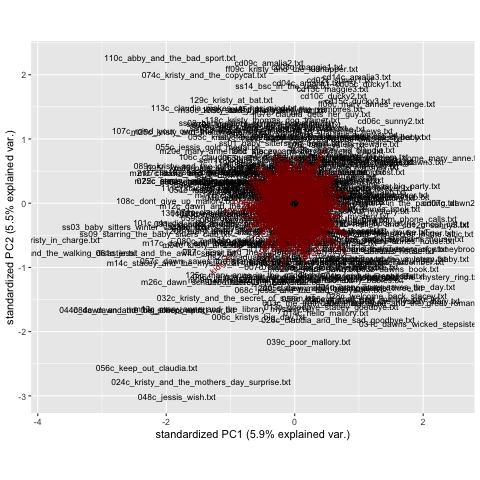

In [20]:
%%R
#How many top words should it use?
evaluated.words=1000
#How many of the very most frequent words should it skip? To skip 0, starts.with = 1.
#To skip 50, starts.with = 51
starts.with=1
#Put the path to the folder containing the folder with your texts here
setwd('~/Documents')
#Put the name of the folder with your texts here
Filename<-list.files('dsc_nouns')
#If you want to strip anything off the text filename for the title besides .txt you can change this
Title<-unlist(strsplit(Filename, ".txt"))
#Creates the metadata table
dsc.meta<-data.frame(Filename, Title, stringsAsFactors = FALSE)
#Runs the Typicality code
means.text<-corpusTypicalityGGBiplot('dsc_nouns', dsc.meta, ".", corpus.name="dsc_nouns")

<img src='_static/images/dsc10_scaled_biplot.jpg' alt='Scaled biplot of the PCA of the Baby-Sitters Club book using top 1k nouns with mysteries circled' />
This time the biplot looked like some kind of funky hair accessory that Claudia might wear. The California Diaries and Friends Forever series were still in the upper right quadrant, but something happened to the Mysteries. Instead of being fairly evenly distributed throughout the chart, most of them were pushed all the way to the bottom, thanks to the scaled effect of words like “mystery”, “clues”, “somebody”, “everybody”, “anybody”, “fact”, and “example”.

“Well, look at that,” Mark remarked. “The mystery words weren’t frequent enough to have much of an impact in the first version, but when we scale it by the z-score, the mysteries cluster together.” That also made sense, and it was a great sanity check for us about what was going on. This version had a big impact on the mysteries, but the other high-level stuff mostly stayed the same. That said, scaling the nouns by z-score had a major impact on our most “average” texts; the only one left near the center was *BSC #103: Happy Holidays Jessi*, a space it shared with *BSC #84: Dawn and the School Spirit War*. 

"Oh, cool -- I get it now!" I exclaimed. "Once you have the feature loadings from the biplot analysis, you can use TF-IDF to look at how significantly the major features for that part of the graph appear in a given text, to get a sense of why it's located there and not somewhere else."

### Interpretation Help from TF-IDF

I pulled up the top terms in the TF-IDF analysis of just the nouns in the books. (TF-IDF, or Term Frequency-Inverse Document Frequency, is a way to get at the distinctive terms in a text. You can read more about it in [DSC #8](https://datasittersclub.github.io/site/dsc8.html#tf-idf).):

| BSC #103: Happy Holidays, Jessi | BSC #84: Dawn and the School Spirit War | BSC #121: Abby in Wonderland |
|---------------------------------|-----------------------------------------|------------------------------|
| room                            | kids                                    | beach                        |
| day                             | school                                  | party                        |
| family                          | spirit                                  | kids                         |
| kids                            | room                                    | time                         |
| holiday                         | time                                    | family                       |
| time                            | way                                     | vacation                     |
| hospital                        | things                                  | everyone                     |
| kitchen                         | students                                | house                        |
| car                             | locker                                  | way                          |
| home                            | house                                   | room                         |

The first term in the TF-IDF for *Dawn and the School Spirit War* was “kids” -- which is what dragged it off to Q3 in the original PCA:
<img src='_static/images/dsc10_school_spirit_war.png' alt='Biplot of the PCA of the Baby-Sitters Club book using top 1k nouns with Dawn and the School Spirit War highlighted' />
But we also see sports words (like “locker”) and domestic words (“room”, “house”) in the mix, so once the effect of “kids” was dampened down a bit with the z-score, *Dawn and the School Spirit War* became “average” through its combination of multiple words that pull in different directions.

For *Happy Holidays Jessi*, “kids” isn’t quite as prominent (so it doesn’t get pulled into Q3 in the original PCA)
<img src='_static/images/dsc10_happy_holidays_jessi.png' alt='Biplot of the PCA of the Baby-Sitters Club book using top 1k nouns with Happy Holidays Jessi highlighted' />

Everything seemed to be making a lot of sense! But I still didn’t understand why BSC #103 *Happy Holidays, Jessi* would be so central like that. So I sent Katia the biplots and some texts.

“Ok, so I don't have answers exactly but I have information,” I texted. “The magic word is biplot! Check your email!”

Katia texted back, “I looked at the biplots on my phone, but I have no idea what I am looking at? They sure are pointy, though!”

“I put everything in the draft!” I replied.

## Katia
I opened up the draft of DSC #10 that Quinn and I had been working on and read through the biplot material. 

“Biplots are really, really cool!” I texted Quinn. “This all makes so much sense now!” And then I got to this graphic:

<img src='_static/images/dsc10_happy_holidays_jessi.png' alt='Biplot of the PCA of the Baby-Sitters Club book using top 1k nouns with Happy Holidays Jessi highlighted' />

Below it the book abruptly ended with Quinn’s bracketed comment:

`[ARGH WHY IS THE HOLIDAY BOOK THE MOST TYPICAL?!?!]`

What was Happy Holidays, Jessi doing there so centrally? Quinn was right. It had seemed like we had all the answers and biplots had solved the mystery of the PCA, but this book’s placement seemed odd. After all, a holiday special book didn’t seem like it should be typical.

I thought about Happy Holidays, Jessi, a book I hadn’t yet gotten to on my analog reread, but which I remembered from my original read in the 90s. A quick search for a plot summary confirmed what I remembered: the book has “Happy Holidays” in the title and Jessi and her family do celebrate Christmas and Kwanzaa in it, but most of the plot is about her younger brother’s injury in a car accident. The plot centers on family, the hospital, and childcare. 

I texted all this to Quinn and added, “What if we tested it with something else to see what the words in the book are doing?”

I put the corpus file for BSC #103 into [Voyant Tools](https://voyant-tools.org/), and with even the first visualization, Cirrus the word cloud, I could see what was happening. I expanded the word count as high as it would go, to 500:
<img src='_static/images/dsc10_cirrus-103.png' alt='Wordcloud of Happy Holidays Jessi from Voyant' />

I sent the cloud to Quinn and texted, “Look! The words are mostly just average, typical words! Kwanzaa is there and some names, but otherwise it’s all family words, home, kitchen, room, etc. What you’d expect for a series about teenage girls babysitting, I guess.”

“Oooh,” texted Quinn. “This is good! This is good! But one catch is that we’re only doing nouns. Do you want me to share the nouns only corpus with you?”

“Yes, please!”

I restarted Voyant and uploaded the nouns-only file of *Happy Holidays, Jessi*... And we got joy!
<img src='_static/images/dsc10_cirrus-103nouns.png' alt='Nouns-only wordcloud of Happy Holidays Jessi from Voyant' />

“Look!” I texted Quinn, “Look at this!” I sent the word cloud of the top 500 nouns. “This is completely what I would expect in a typical book! Kwanzaa and the names were proper nouns, not regular nouns, so they weren’t even part of the nouns-only files we analyzed for the PCA! What’s left is just…. everyday life for the Baby-Sitters Club.”

“Now that’s an ending,” Quinn replied. “And isn’t it cool that we’re starting to have a suite of tools at our disposal to investigate things with?”

The interesting thing I realized through doing this is that when I think about a Baby-Sitters Club book’s plot, I think about the things that happen. But a plot isn’t just nouns. Or adjectives. Or even words. It’s the combination of those things. You can have a bunch of mentions of “beach” in a beach novel, but it doesn’t make all beach novels seem all that similar to the reader. As a reader, you think about similarity and typicality as two sides of the same coin. But the computer hasn’t read any of the Baby-Sitters Club books in the same sense that you have. The computer only counts nouns, or words, or whatever you give it. BSC #103: *Happy Holidays, Jessi* doesn’t seem like it should be typical, but when you look at what the computer is processing, all the nouns that make it more of a stand-out are stripped away. The results can be counterintuitive on a corpus like ours, a small one where there isn’t necessarily a lot of diversity of vocabulary.

An important take-away from DSC #10 is that you need to know your corpus and also know what you’re looking for before you try to draw conclusions! Some might say we’re way too familiar with the specifics of the books’ plots, but one of the key areas of expertise that Roopsi and I bring to the DSC is our knowledge of the BSC corpus. For PCA, this is crucial. Over the course of this book, I’ve had so many texts from Quinn asking me about why this book appears there, or what the specifics are with that book, in order to figure out what it is doing. PCA is counting words, extracting data, and creating visualizations, but in order to interpret the results you get, you need to know both what the computer is reading and what is in your corpus. 

On the YAMS corpus, PCA can show us that the Baby-Sitters Mystery series is more similar to the regular BSC books than other YA mysteries. And it can show us that Gossip Girl and Sweet Valley High are similar to one another. And that there’s a more complicated relationship between the Hardy Boys, Nancy Drew, and Boxcar Children that gives you different results depending on whether you’re looking at nouns or all words. But it isn’t going into the specifics in a thorough way. It is counting nouns or words or whatever and munging parts of it together in a graph so that we can understand what’s happening better than we could on a SPREADSHEET OF DOOM. That can be really useful, but it’s important to remember that, as with any of these tools, it can’t tell you everything. 

## Suggested citation
Algee-Hewitt, Mark, Katherine Bowers, Quinn Dombrowski, and Heather Froehlich. "Heather Loves Principal Component Analysis". *The Data-Sitters Club*. July 20, 2021.